In [1]:
#Configure inline to export plots in svg format
%config InlineBackend.figure_format = 'svg'

In [2]:
#Import python libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
 
import seaborn as sns 

In [3]:
#Import Boston dataset from scikit_learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
#Transfor the dataset into dataframe using Panda function
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Check dataset dictionary keys 
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
#Add response variable "MEDV" to the main dataframe
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

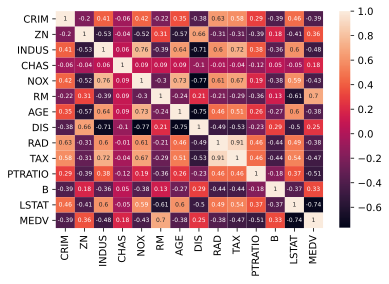

In [7]:
#Derive correlation matrix of the variable existed in Boston dataset
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"fontsize":6})

In [8]:
#Create X predictor variable and Y response variable
X = pd.DataFrame(boston['LSTAT'])
Y = boston['MEDV']

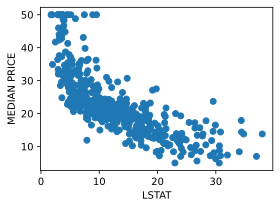

In [9]:
# Scatter plot to showcase relationship between MEDV and LSTAT variables
plt.figure(figsize=(4, 3))
plt.scatter(X, Y)
plt.axis('tight')
plt.xlabel('LSTAT')
plt.ylabel('MEDIAN PRICE')
plt.tight_layout()

In [10]:
#Use Python library module to split the dataframe into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [11]:
from sklearn.linear_model import LinearRegression

#Build Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
#Use the built model for prediction purpose
predicted = lin_model.predict(X_test)
expected = Y_test

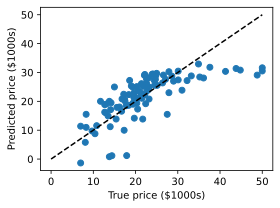

In [13]:
#Plot expected vs predicted median house price
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [14]:
#Evalute R-squared value
from sklearn.metrics import r2_score

y_test_predict = lin_model.predict(X_test)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for test set")
print('R2 score is {}'.format(r2))

The model performance for test set
R2 score is 0.5041523728903132
